# Correlated Body Parts

[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/ProbablyOverthinkingIt/blob/book/examples/ansur_corr.ipynb).

In [1]:
# Install empirical dist if we don't already have it

try:
    import empiricaldist
except ImportError:
    !pip install empiricaldist

In [2]:
# download utils.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
        
download("https://github.com/AllenDowney/ProbablyOverthinkingIt/raw/book/notebooks/utils.py")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## ANSUR

Here's the ANSUR data, originally downloaded from [The OPEN Design Lab](https://www.openlab.psu.edu/ansur2/).

In [4]:
download("https://github.com/AllenDowney/ProbablyOverthinkingIt/raw/book/data/ANSURIIFEMALEPublic.csv")
download("https://github.com/AllenDowney/ProbablyOverthinkingIt/raw/book/data/ANSURIIMALEPublic.csv")

In [5]:
ansur_female = pd.read_csv("ANSURIIFEMALEPublic.csv", encoding="ISO-8859-1")
ansur_female.shape

(1986, 108)

In [6]:
ansur_male = pd.read_csv("ANSURIIMALEPublic.csv", encoding="ISO-8859-1")
ansur_male.shape

(4082, 108)

[*The Measurer’s Handbook*](http://tools.openlab.psu.edu/publicData/ANSURII-TR11-017.pdf) used in the ANSUR survey is 253 pages,
and includes details on "sampling strategy and measuring techniques"
as well as descriptions and diagrams of the landmarks and measurements between them.



Since heights are in mm, I converted to cm.

In [7]:
height_male = ansur_male["stature"] / 10
height_female = ansur_female["stature"] / 10

In [8]:
len(ansur_male)

4082

In [9]:
len(ansur_female)

1986

## Correlations

Here are the names of the measurements.

In [10]:
df = ansur_male
h = df['earlength']
y = df['earprotrusion']
ratio = 0.8 * y/h

In [11]:
measurements = [column for column in df.columns if column.lower() == column]
measurements.remove('subjectid')
measurements

['abdominalextensiondepthsitting',
 'acromialheight',
 'acromionradialelength',
 'anklecircumference',
 'axillaheight',
 'balloffootcircumference',
 'balloffootlength',
 'biacromialbreadth',
 'bicepscircumferenceflexed',
 'bicristalbreadth',
 'bideltoidbreadth',
 'bimalleolarbreadth',
 'bitragionchinarc',
 'bitragionsubmandibulararc',
 'bizygomaticbreadth',
 'buttockcircumference',
 'buttockdepth',
 'buttockheight',
 'buttockkneelength',
 'buttockpopliteallength',
 'calfcircumference',
 'cervicaleheight',
 'chestbreadth',
 'chestcircumference',
 'chestdepth',
 'chestheight',
 'crotchheight',
 'crotchlengthomphalion',
 'crotchlengthposterioromphalion',
 'earbreadth',
 'earlength',
 'earprotrusion',
 'elbowrestheight',
 'eyeheightsitting',
 'footbreadthhorizontal',
 'footlength',
 'forearmcenterofgriplength',
 'forearmcircumferenceflexed',
 'forearmforearmbreadth',
 'forearmhandlength',
 'functionalleglength',
 'handbreadth',
 'handcircumference',
 'handlength',
 'headbreadth',
 'headcir

In [12]:
n = len(measurements)
n

93

In [13]:
n * (n-1)

8556

In [14]:
corr = df[measurements].corr().replace(1, np.nan)

In [15]:
corr.loc['functionalleglength', 'sleevelengthspinewrist']

0.7420478183396856

In [16]:
corr.loc['sleevelengthspinewrist', 'chestcircumference']

0.4661963124644739

In [17]:
corr.stack().sort_values()[-60:-30]

tenthribheight          axillaheight              0.942308
axillaheight            tenthribheight            0.942308
interscyei              interscyeii               0.942621
interscyeii             interscyei                0.942621
tenthribheight          cervicaleheight           0.943012
cervicaleheight         tenthribheight            0.943012
buttockcircumference    thighcircumference        0.943031
thighcircumference      buttockcircumference      0.943031
hipbreadthsitting       buttockcircumference      0.944004
buttockcircumference    hipbreadthsitting         0.944004
buttockpopliteallength  buttockkneelength         0.945302
buttockkneelength       buttockpopliteallength    0.945302
tibialheight            kneeheightsitting         0.945968
kneeheightsitting       tibialheight              0.945968
iliocristaleheight      tenthribheight            0.947737
tenthribheight          iliocristaleheight        0.947737
chestheight             stature                   0.9478

In [18]:
sort_by_mean = corr.mean().sort_values()
sort_by_mean

earprotrusion             0.015477
earbreadth                0.129201
tragiontopofhead          0.129900
elbowrestheight           0.147210
headbreadth               0.182999
                            ...   
sleevelengthspinewrist    0.533537
buttockkneelength         0.535248
suprasternaleheight       0.536546
heelanklecircumference    0.538426
weightkg                  0.555301
Length: 93, dtype: float64

In [19]:
sort_by_mag = corr.abs().mean().sort_values()
sort_by_mag

earprotrusion             0.033929
tragiontopofhead          0.130670
earbreadth                0.130778
headbreadth               0.183395
elbowrestheight           0.199004
                            ...   
sleevelengthspinewrist    0.534839
suprasternaleheight       0.536546
buttockkneelength         0.536763
heelanklecircumference    0.538426
weightkg                  0.555301
Length: 93, dtype: float64

<Axes: >

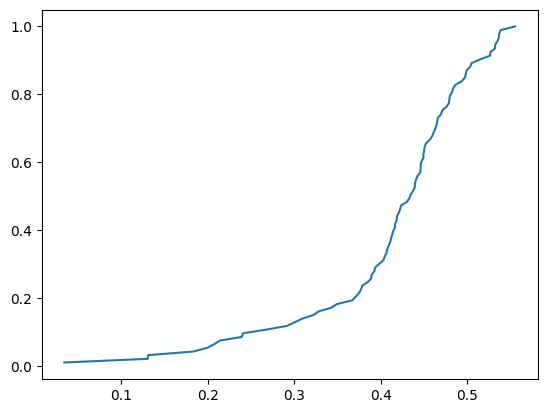

In [20]:
from empiricaldist import Cdf

cdf = Cdf.from_seq(corr.abs().mean())
cdf.plot()

In [21]:
sort_by_std = corr.std().sort_values()
sort_by_std[:10]

earprotrusion                     0.045076
earbreadth                        0.048630
tragiontopofhead                  0.052300
mentonsellionlength               0.063830
interpupillarybreadth             0.078475
earlength                         0.084449
headlength                        0.086664
crotchlengthposterioromphalion    0.102658
headcircumference                 0.103708
lateralmalleolusheight            0.105189
dtype: float64

In [22]:
color_map = dict(earprotrusion='C0',
                earbreadth='C1',
                tragiontopofhead='C2',
                mentonsellionlength='C3',
                interpupillarybreadth='C4',
                earlength='C5',
                headlength='C6',
                earangle='C9',
                elbowrestheight='C8')

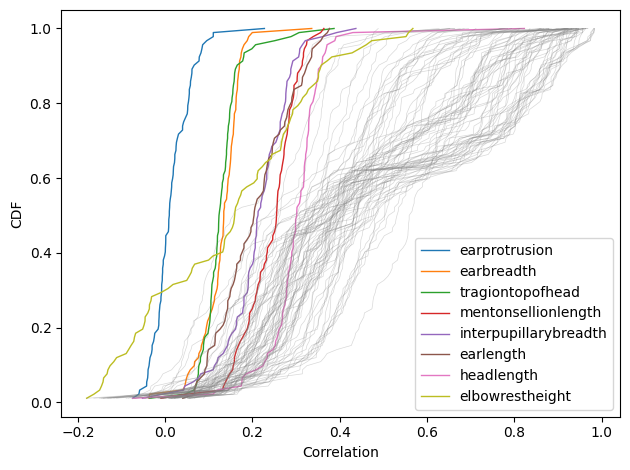

In [23]:
from empiricaldist import Cdf
from utils import decorate

for column in sort_by_std.index:
    # print(column)
    if column in color_map:
        options = dict(color=color_map[column], lw=1, label=column)
    else:
        options = dict(color='gray', lw=0.5, alpha=0.3)
    
    cdf = Cdf.from_seq(corr[column].dropna())
    cdf.plot(**options)
    
decorate(xlabel='Correlation', ylabel='CDF')

In [24]:
corr['elbowrestheight'].sort_values()

radialestylionlength            -0.179943
sleeveoutseam                   -0.163382
shoulderelbowlength             -0.150278
poplitealheight                 -0.145983
span                            -0.142488
                                   ...   
waistfrontlengthsitting          0.473432
verticaltrunkcircumferenceusa    0.551773
eyeheightsitting                 0.557657
sittingheight                    0.567685
elbowrestheight                       NaN
Name: elbowrestheight, Length: 93, dtype: float64

In [25]:

# Convert the DataFrame to a NumPy array
array = corr.to_numpy()

# Set elements below the main diagonal to NaN
array[np.tril_indices(len(array))] = np.nan

# Convert the modified NumPy array back to a DataFrame
stacked = pd.DataFrame(array, columns=corr.columns, index=corr.index).stack()

stacked.sort_values()[:30]

elbowrestheight                 radialestylionlength             -0.179943
                                sleeveoutseam                    -0.163382
                                shoulderelbowlength              -0.150278
                                poplitealheight                  -0.145983
                                span                             -0.142488
crotchheight                    elbowrestheight                  -0.141063
acromionradialelength           elbowrestheight                  -0.133157
elbowrestheight                 shoulderlength                   -0.131196
buttockpopliteallength          elbowrestheight                  -0.126297
elbowrestheight                 forearmhandlength                -0.117779
                                forearmcenterofgriplength        -0.111352
                                trochanterionheight              -0.089376
buttockheight                   elbowrestheight                  -0.083696
elbowrestheight          

In [26]:
n = len(df)
n

4082

In [27]:
corrs = []
for i in range(1000):
    x = np.random.normal(size=n)
    y = np.random.normal(size=n)
    c = np.corrcoef(x, y)[0][1]
    corrs.append(c)
    


In [28]:
corr['earprotrusion'].sort_values().dropna()

buttockheight                    -0.060297
buttockpopliteallength           -0.058548
balloffootlength                 -0.040214
crotchheight                     -0.039504
buttockkneelength                -0.029901
bitragionchinarc                 -0.014629
bicepscircumferenceflexed        -0.014522
bitragionsubmandibulararc        -0.012047
chestheight                      -0.009855
axillaheight                     -0.004442
acromionradialelength             0.000258
acromialheight                    0.001088
abdominalextensiondepthsitting    0.001316
cervicaleheight                   0.007982
bideltoidbreadth                  0.010165
biacromialbreadth                 0.014970
chestdepth                        0.018635
buttockcircumference              0.021316
chestcircumference                0.022046
buttockdepth                      0.024627
chestbreadth                      0.028038
bimalleolarbreadth                0.039829
bicristalbreadth                  0.051520
crotchlengt

<Axes: xlabel='earprotrusion'>

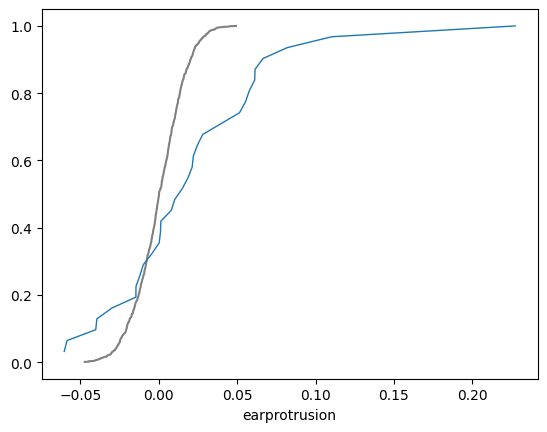

In [29]:
cdf = Cdf.from_seq(corrs)
cdf.plot(color='gray')

cdf = Cdf.from_seq(corr['earprotrusion'].dropna())
options = dict(color='C0', lw=1, label=column)
cdf.plot(**options)



Probably Overthinking It

Copyright 2022 Allen Downey 

The code in this notebook and `utils.py` is under the [MIT license](https://mit-license.org/).